In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [94]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


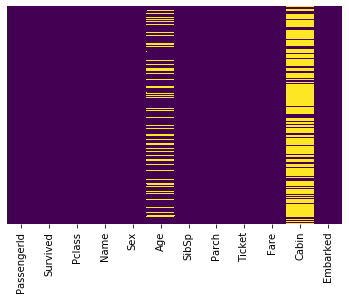

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Could predict age for the null values

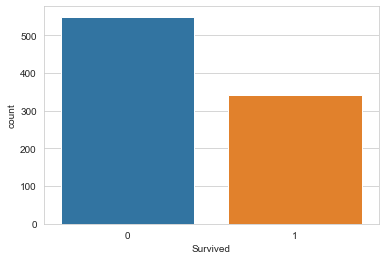

In [12]:
sns.countplot(x='Survived',data=train)

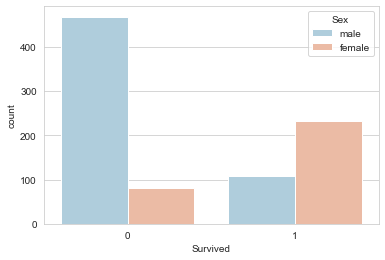

In [14]:
sns.countplot(x='Survived',hue='Sex',palette ='RdBu_r',data=train)

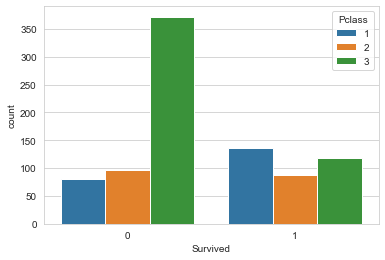

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

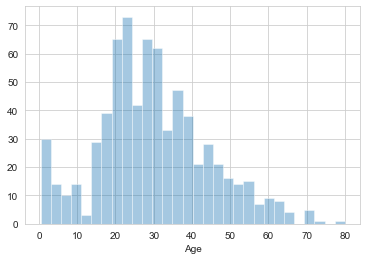

In [19]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

## Partially Bi-Modal

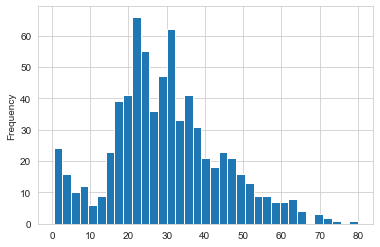

In [21]:
train['Age'].plot.hist(bins=35)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


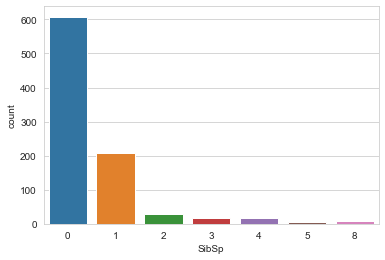

In [23]:
sns.countplot(x='SibSp',data=train)

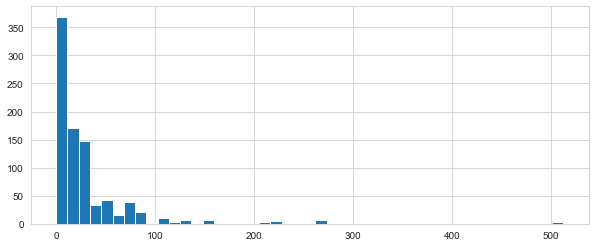

In [27]:
train['Fare'].hist(bins=45,figsize=(10,4))

In [31]:
#import cufflinks as cf
#cf.go_offline()
#train['Fare'].iplot(kind='hist',bins=50)

# Cleaning Data

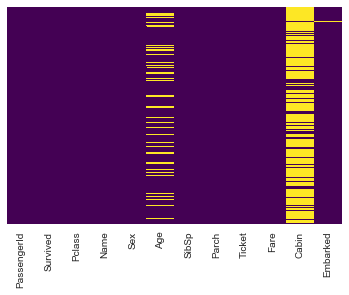

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

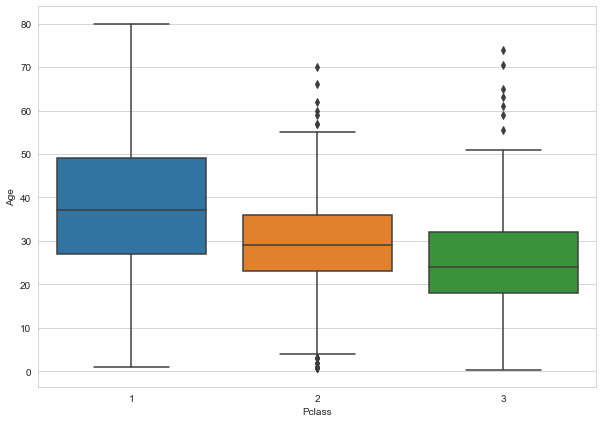

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# Imputation of Age

Here we created a function to replace all null age values with the average age in the respective class. If the age is not null, it is not altered from the original value.

In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age    

In [95]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

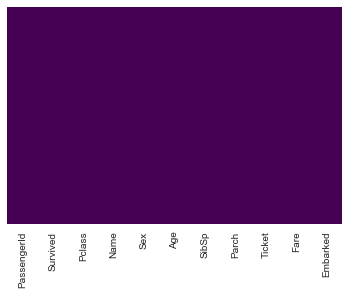

In [99]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
train.drop('Cabin',axis=1,inplace=True)

In [98]:
train.dropna(inplace=True)

# Converting Classifications to Dummy Variables

In [52]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


### Multicollinearity
An issue where one variable is utilized to predict another values. The example here is when a person is a female, the algorithm will automatically assume male. While this is not entirely wrong, it is bad practice. We then remove the female variable and leave only male. 

In [100]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [101]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [102]:
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [103]:
train= pd.concat([train,sex,embark,Pclass],axis=1)

In [104]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [105]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [107]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1


# Create, Train, and Build Model

In [108]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.linear_model import LogisticRegression

In [110]:
lgm = LogisticRegression(solver='liblinear')

In [111]:
lgm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
predictions = lgm.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [88]:
from sklearn.metrics import confusion_matrix

In [129]:
cf=confusion_matrix(y_test,predictions)
print(cf)


[[150  13]
 [ 36  68]]


267

In [133]:
Accuracy=(cf[0,0]+cf[1,1])/sum(cf[1,]+cf[0,])
Error=(cf[0,1]+cf[1,0])/sum(cf[1,]+cf[0,])

In [131]:
Accuracy

0.8164794007490637

In [134]:
Error

0.18352059925093633